In [1]:
import ROOT
ROOT.gSystem.Load("RooUnfold/libRooUnfold")
ROOT.gStyle.SetOptStat(000000)



Welcome to JupyROOT 6.10/08


In [2]:
pdffile = ROOT.TFile('qcdmc_pythiaflat_pdf4lhc15_2dplots.root')

lumi = 2300.

In [3]:

pdfnom_response = pdffile.Get('2d_response')
pdfup_response = pdffile.Get('2d_response_pdfup')
pdfdn_response = pdffile.Get('2d_response_pdfdn')
pdf_reco = pdffile.Get('PFJet_pt_m_AK8')
pdf_reco.Scale(1.0 / lumi)

unfold_nom = ROOT.RooUnfoldBayes(pdfnom_response, pdf_reco, 4)
unfold_nom.SetName("unfold_nom")
unfolded_nom = unfold_nom.Hreco().Clone("2d_response_nom_mc")

unfold_pdfup = ROOT.RooUnfoldBayes(pdfup_response, pdf_reco, 4)
unfold_pdfup.SetName("unfold_pdfup")
unfolded_pdfup = unfold_pdfup.Hreco().Clone("2d_response_pdfup_mc")

unfold_pdfdn = ROOT.RooUnfoldBayes(pdfdn_response, pdf_reco, 4)
unfold_pdfdn.SetName("unfold_pdfdn")
unfolded_pdfdn = unfold_pdfdn.Hreco().Clone("2d_response_pdfdn_mc")




Add truth bin for 2.82144 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 9.25843e-11
Iteration : 1
Chi^2 of change 1.63533e-11
Iteration : 2
Chi^2 of change 3.77967e-12
Iteration : 3
Chi^2 of change 1.07907e-12
Calculating covariances due to number of measured events
Add truth bin for 2.83533 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 0.000152784
Iteration : 1
Chi^2 of change 8.82354e-06
Iteration : 2
Chi^2 of change 1.02023e-05
Iteration : 3
Chi^2 of change 1.57087e-05
Calculating covariances due to number of measured events
Add truth bin for 2.75357 fakes
Now unfolding...
Iteration : 0
Chi^2 of change 0.000144307
Iteration : 1
Chi^2 of change 8.05401e-06
Iteration : 2
Chi^2 of change 1.03083e-05
Iteration : 3
Chi^2 of change 1.51221e-05
Calculating covariances due to number of measured events


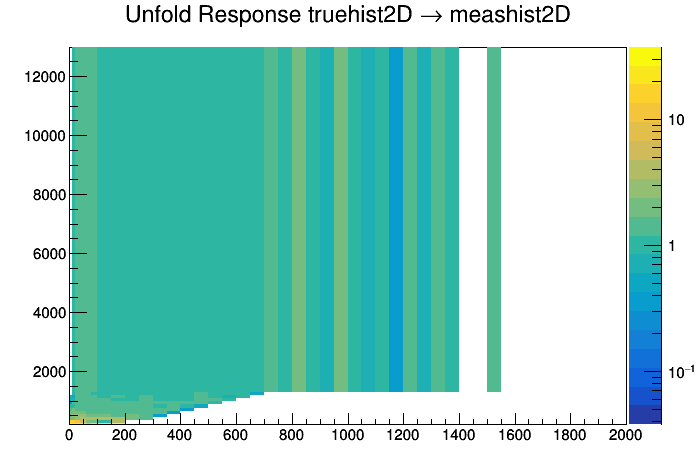

In [4]:



ratio = unfolded_pdfup.Clone("ratio")
#ratio.Add( unfolded_nom, -1.0 )
ratio.Divide(unfolded_nom)

c = ROOT.TCanvas("c", "c")
ratio.Draw("colz")

c.SetLogz()
c.Draw()

In [5]:
def printit( ratio ):
    for ibin in xrange(ratio.GetNbinsX()):
        print '%5.0f' % ( ratio.GetXaxis().GetBinLowEdge(ibin)),
        for jbin in xrange(ratio.GetNbinsY()):
            print '%5.2e' % ( abs(ratio.GetBinContent(ibin,jbin))),
        print ''
    return


printit(ratio)

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 2.47e+00 2.99e-01 7.37e-01 6.55e-01 0.00e+00 0.00e+00 5.08e-01 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 2.61e+01 1.39e+01 9.21e-01 8.36e-01 1.05e+00 0.00e+00 2.02e+00 0.00e+00 0.00e+00 0.00e+00 6.38e-01 
    5 0.00e+00 2.74e+01 1.37e+01 2.10e+00 1.81e+00 2.17e+00 1.23e+00 1.06e+00 4.18e-01 7.52e-01 7.23e-01 0.00e+00 
   10 0.00e+00 2.64e+01 1.35e+01 1.79e+00 2.50e+00 1.95e+00 1.82e+00 1.13e+00 1.64e+00 6.62e-01 5.18e-01 9.10e-01 
   20 0.00e+00 2.61e+01 1.24e+01 2.45e+00 2.60e+00 1.79e+00 1.49e+00 1.38e+00 1.24e+00 1.23e+00 1.19e+00 1.22e+00 
   40 0.00e+00 1.95e+01 6.63e+00 3.42e+00 2.44e+00 1.70e+00 1.44e+00 1.36e+00 1.27e+00 1.24e+00 1.21e+00 1.24e+00 
   60 0.00e+00 1.06e+01 1.82e+00 3.76e+00 2.27e+00 1.61e+00 1.42e+00 1.32e+00 1.30e+00 1.23e+00 1.28e+00 1.23e+00 
   80 0.00e+00 2.13e+01 2.36e+00 3.73e+00 2.04e+00 1.54e+00 1.39e+00 1.28e+00 1.

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 3.97e-10 4.00e-10 7.33e-11 8.54e-12 0.00e+00 2.27e-12 1.62e-11 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 3.58e-08 1.76e-08 9.31e-10 2.99e-10 5.71e-11 0.00e+00 2.30e-11 0.00e+00 0.00e+00 0.00e+00 1.55e-12 
    5 0.00e+00 1.68e-06 2.26e-07 1.97e-08 1.65e-09 6.36e-10 1.00e-10 1.95e-11 1.30e-11 6.41e-12 3.12e-13 0.00e+00 
   10 0.00e+00 8.98e-05 1.27e-05 1.22e-06 1.12e-07 2.49e-08 5.43e-09 1.47e-09 2.65e-10 1.42e-10 1.90e-11 1.39e-11 
   20 0.00e+00 1.42e-03 2.65e-04 3.32e-05 3.89e-06 9.87e-07 2.62e-07 7.67e-08 1.44e-08 5.50e-09 2.13e-09 8.63e-10 
   40 0.00e+00 1.77e-03 4.96e-04 8.62e-05 1.25e-05 3.62e-06 1.08e-06 3.53e-07 7.41e-08 2.98e-08 1.26e-08 5.67e-09 
   60 0.00e+00 7.82e-04 3.04e-04 7.54e-05 1.43e-05 4.86e-06 1.64e-06 6.04e-07 1.38e-07 5.97e-08 2.70e-08 1.24e-08 
   80 0.00e+00 2.90e-04 1.52e-04 4.44e-05 9.98e-06 3.82e-06 1.46e-06 6.03e-07 1.

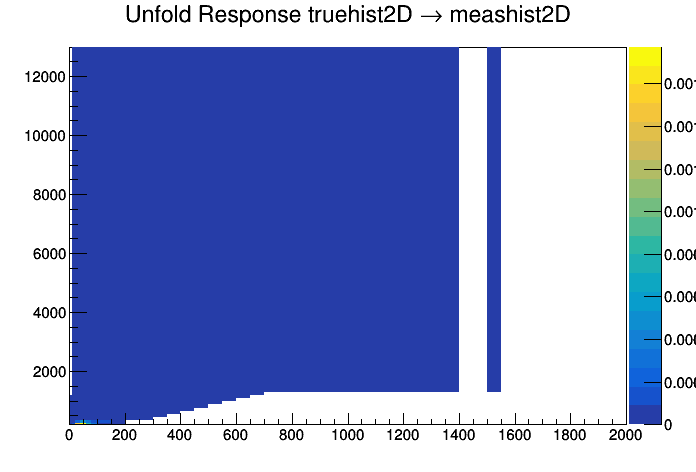

In [6]:
c1 = ROOT.TCanvas("c1", "c1")
unfolded_nom.Draw("colz")
c1.Draw()

printit(unfolded_nom)


  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 9.80e-10 1.19e-10 5.40e-11 5.60e-12 0.00e+00 0.00e+00 8.23e-12 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 9.35e-07 2.45e-07 8.57e-10 2.50e-10 5.99e-11 0.00e+00 4.64e-11 0.00e+00 0.00e+00 0.00e+00 9.92e-13 
    5 0.00e+00 4.60e-05 3.10e-06 4.12e-08 3.00e-09 1.38e-09 1.24e-10 2.06e-11 5.44e-12 4.83e-12 2.25e-13 0.00e+00 
   10 0.00e+00 2.37e-03 1.72e-04 2.19e-06 2.81e-07 4.87e-08 9.86e-09 1.65e-09 4.36e-10 9.41e-11 9.85e-12 1.27e-11 
   20 0.00e+00 3.71e-02 3.28e-03 8.11e-05 1.01e-05 1.77e-06 3.92e-07 1.06e-07 1.77e-08 6.75e-09 2.54e-09 1.06e-09 
   40 0.00e+00 3.45e-02 3.29e-03 2.95e-04 3.06e-05 6.16e-06 1.55e-06 4.80e-07 9.39e-08 3.70e-08 1.52e-08 7.02e-09 
   60 0.00e+00 8.32e-03 5.53e-04 2.83e-04 3.26e-05 7.83e-06 2.33e-06 7.97e-07 1.79e-07 7.37e-08 3.46e-08 1.53e-08 
   80 0.00e+00 6.16e-03 3.57e-04 1.66e-04 2.03e-05 5.89e-06 2.03e-06 7.74e-07 1.

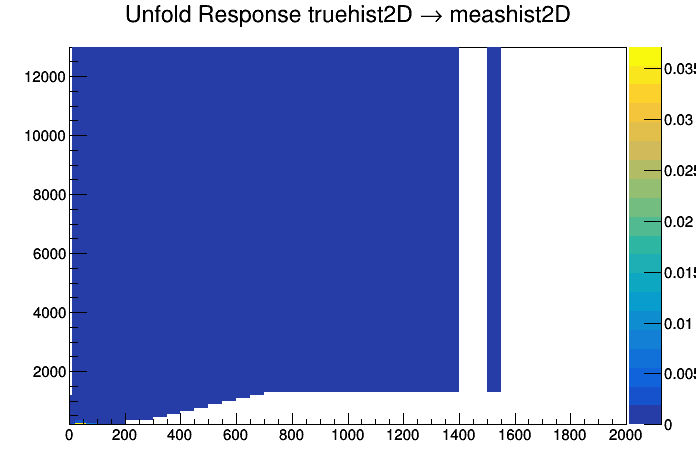

In [7]:
c2 = ROOT.TCanvas("c2", "c2")
unfolded_pdfup.Draw("colz")
c2.Draw()

printit(unfolded_pdfup)

  -43 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 0.00e+00 
    0 0.00e+00 0.00e+00 1.01e-09 1.21e-10 5.36e-11 5.64e-12 0.00e+00 0.00e+00 8.24e-12 0.00e+00 0.00e+00 0.00e+00 
    1 0.00e+00 8.85e-07 2.30e-07 8.48e-10 2.48e-10 6.06e-11 0.00e+00 4.61e-11 0.00e+00 0.00e+00 0.00e+00 9.75e-13 
    5 0.00e+00 4.34e-05 2.90e-06 3.91e-08 2.97e-09 1.31e-09 1.25e-10 2.03e-11 5.40e-12 4.91e-12 2.31e-13 0.00e+00 
   10 0.00e+00 2.25e-03 1.61e-04 2.07e-06 2.67e-07 4.77e-08 9.42e-09 1.64e-09 4.28e-10 9.34e-11 9.75e-12 1.26e-11 
   20 0.00e+00 3.53e-02 3.09e-03 7.60e-05 9.63e-06 1.71e-06 3.81e-07 1.04e-07 1.74e-08 6.52e-09 2.51e-09 1.03e-09 
   40 0.00e+00 3.36e-02 3.12e-03 2.77e-04 2.93e-05 5.96e-06 1.51e-06 4.70e-07 9.22e-08 3.64e-08 1.50e-08 6.88e-09 
   60 0.00e+00 8.51e-03 5.49e-04 2.68e-04 3.13e-05 7.56e-06 2.27e-06 7.79e-07 1.75e-07 7.21e-08 3.37e-08 1.51e-08 
   80 0.00e+00 6.03e-03 3.65e-04 1.58e-04 1.96e-05 5.70e-06 1.98e-06 7.57e-07 1.

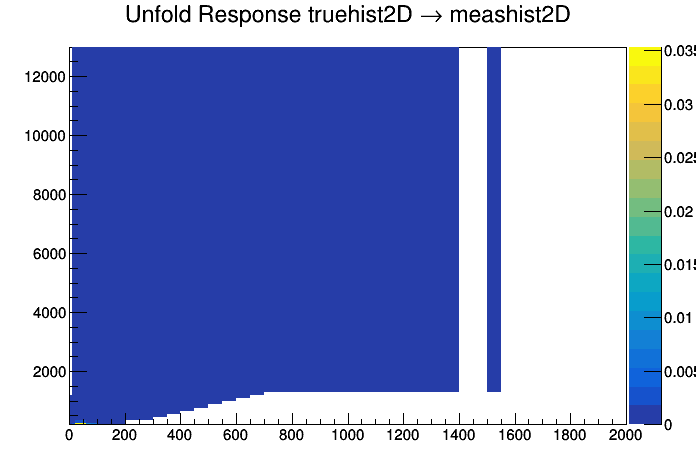

In [8]:
c3 = ROOT.TCanvas("c3", "c3")
unfolded_pdfdn.Draw("colz")
c3.Draw()

printit(unfolded_pdfdn)